LSTMs are very powerful in sequence prediction problems because they’re able to store past information. This is important in our case because the previous price of a stock is crucial in predicting its future price.The Long Short-Term Memory network or LSTM network is a type of recurrent neural network used in deep learning because very large architectures can be successfully trained.

**Time-series forecasting models are the models that are capable to predict future values based on previously observed values**

**This tutorial illustrates how to get started with Recurrent Neural Network for Stock Prediction of Tata. This Recurrent Neural Network usus Long Short Term Memory and predicts the up/down nature of the trendline of  Stock Price. Stock market data is a great choice for this because it’s quite regular and widely available to everyone.** 

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:

# Importing the training set - entire data
dataset_train = pd.read_csv('/content/drive/MyDrive/DeepLearning_Workshop/NSE-TATAGLOBAL.csv')

dataset_train.shape


(2035, 8)

In [6]:
dataset_train

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [7]:
# Selecting feature for our model
training_set = dataset_train.iloc[:, 1:2].values

In [8]:
print(training_set)

[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]


In [9]:
#The High and Low columns represent the highest and lowest prices for a certain day.
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [10]:
dataset_train.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


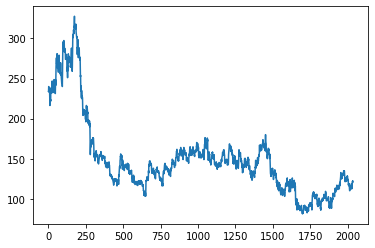

In [11]:
#plotting the open column
plt.plot(training_set)

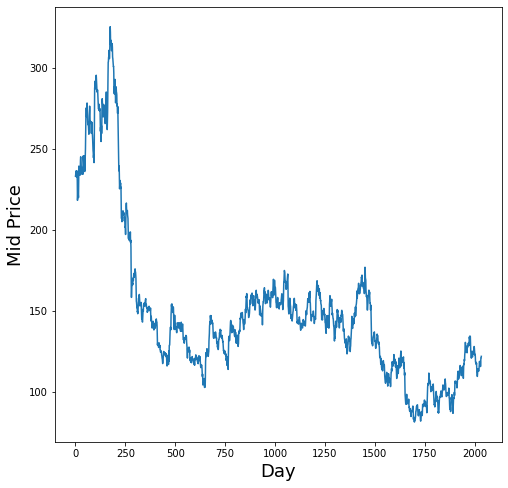

In [12]:
#Visulalizing Data
plt.figure(figsize = (8,8))
plt.plot(range(dataset_train.shape[0]),(dataset_train['Low']+dataset_train['High'])/2.0)

plt.xlabel('Day',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [13]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

LSTMs expect our data to be in a specific format, usually a 3D array. Timestep is very important. It means previous how many values to consider for next value. Need to convert (2035, 8) into 3D.

In [15]:
#The vanilla LSTM network has three layers; an input layer, a single hidden layer followed by a standard feedforward output layer. The stacked LSTM is an extension to the vanilla model that has multiple hidden LSTM layers with each layer containing multiple cells

In [16]:
# Creating a data structure with 60 timesteps and 1 output
#
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
print(X_train)

[[0.6202352  0.62226277 0.64436334 ... 0.79622871 0.81062449 0.74371452]
 [0.62226277 0.64436334 0.61719384 ... 0.81062449 0.74371452 0.77007299]
 [0.64436334 0.61719384 0.61820762 ... 0.74371452 0.77007299 0.73641525]
 ...
 [0.19870235 0.21796431 0.21553122 ... 0.14963504 0.14801298 0.15815085]
 [0.21796431 0.21553122 0.20600162 ... 0.14801298 0.15815085 0.16504461]
 [0.21553122 0.20600162 0.21654501 ... 0.15815085 0.16504461 0.15896188]]


In [18]:
print(y_train)

[0.77007299 0.73641525 0.73763179 ... 0.16504461 0.15896188 0.16626115]


In [19]:
print(X_train.shape),  print(y_train.shape)

(1975, 60)
(1975,)


(None, None)

In [20]:
# Reshaping to make it 3D
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
X_train.shape

(1975, 60, 1)

In order to build the LSTM, we need to import a couple of modules from Keras:

Sequential for initializing the neural network
Dense for adding a densely connected neural network layer
LSTM for adding the Long Short-Term Memory layer
Dropout for adding dropout layers that prevent overfitting

In [22]:

# Building the LSTM

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [24]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [25]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [26]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [27]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the LSTM
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the LSTM to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
62/62 [==============================] - 17s 133ms/step - loss: 0.0100
Epoch 2/50
62/62 [==============================] - 7s 116ms/step - loss: 0.0031
Epoch 3/50
62/62 [==============================] - 7s 115ms/step - loss: 0.0024
Epoch 4/50
62/62 [==============================] - 7s 114ms/step - loss: 0.0028
Epoch 5/50
62/62 [==============================] - 8s 123ms/step - loss: 0.0023
Epoch 6/50
62/62 [==============================] - 7s 114ms/step - loss: 0.0021
Epoch 7/50
62/62 [==============================] - 7s 112ms/step - loss: 0.0023
Epoch 8/50
62/62 [==============================] - 7s 118ms/step - loss: 0.0021
Epoch 9/50
62/62 [==============================] - 7s 116ms/step - loss: 0.0021
Epoch 10/50
62/62 [==============================] - 7s 116ms/step - loss: 0.0020
Epoch 11/50
62/62 [==============================] - 7s 117ms/step - loss: 0.0017
Epoch 12/50
62/62 [==============================] - 7s 117ms/step - loss: 0.0017
Epoch 13/50
62/62 [=====

In [29]:
#  Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/DeepLearning_Workshop/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [30]:
print(dataset_test.shape), print(real_stock_price.shape)

(16, 8)
(16, 1)


(None, None)

In order to predict future stock prices we need to do a couple of things after loading in the test set:

Merge the training set and the test set on the 0 axis.
Set the time step as 60 (as seen previously)
Use MinMaxScaler to transform the new dataset
Reshape the dataset as done previously

total size= 2035+16=2051


First, we need to concatenate the train and test datasets for prediction, because we use the previous 60 days’ stock prices to predict the next-day price. In another word, we need the 60 days’ price before the 1st date in the test dataset.

In [31]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print(len(dataset_total))
print(len(dataset_test))
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)


2051
16


In [32]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [33]:
predicted_stock_price.shape

(16, 1)

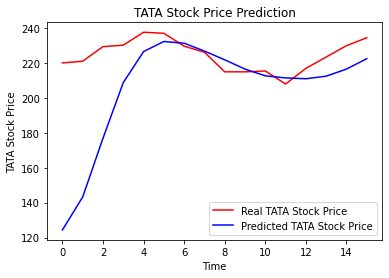

In [34]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()